## 1. Importación de librerías

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import fetch_california_housing
from keras import Sequential
from keras.layers import Input, Dropout, ReLU, Dense, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 2. Carga de datos

In [2]:
# importamos datos
data = fetch_california_housing(as_frame=True)
df = data.frame

In [3]:
df.shape

(20640, 9)

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Transformamos nuestro df en array
array_data = df.values 

# Separamos datos en X e y
X = array_data[:, :-1]  # todas las columnas menos la última
y = array_data[:, -1]   # la última columna es la target

In [6]:
# Normalizamos los datos para mejorar el rendimiento de la red
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Spliteamos train y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 4. Arquitectura del modelo


In [ ]:
# Arquitectura
model = Sequential(layers=[
    Input(shape = (X_train.shape[1],)),
    Dense(64),
    # BatchNormalization(),
    ReLU(),
    Dropout(0.3),

    Dense(32),
    # BatchNormalization(),
    ReLU(),
    Dropout(0.2),

    Dense(1)    # Salida para la regresión
])

In [9]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## 5. Entrenamiento

In [10]:
# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)

# ModelCheckpoint
checkpoint = ModelCheckpoint(
    filepath='mejor_modelo.keras',  # nombre del archivo a guardar
    monitor='val_loss',             # observa la misma métrica
    save_best_only=True,           # guarda solo el mejor modelo
    verbose=1
)

In [11]:
# Entrenamos
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/100
386/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5692 - mae: 1.1198
Epoch 1: val_loss improved from inf to 0.57656, saving model to mejor_modelo.keras
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.4986 - mae: 1.1006 - val_loss: 0.5766 - val_mae: 0.5495
Epoch 2/100
390/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7585 - mae: 0.6226
Epoch 2: val_loss improved from 0.57656 to 0.47307, saving model to mejor_modelo.keras
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7552 - mae: 0.6213 - val_loss: 0.4731 - val_mae: 0.4812
Epoch 3/100
379/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6043 - mae: 0.5588
Epoch 3: val_loss improved from 0.47307 to 0.44172, saving model to mejor_modelo.keras
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6036 - mae: 0.5584 - val_loss: 0.4417 - val_mae: 0.4634
Epoch 4/100
410/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6364 - mae: 0.5380
Epoch 4: val_loss did not improve from 0.44172
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

## 6. Evaluación

In [12]:
# Predecimos
y_pred = model.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step


In [13]:
y_pred = model.predict(X_test).flatten()

for real, pred in zip(y_test[:5], y_pred[:5]):
    print(f"Real: {real:.2f} - Predicción: {pred:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step
Real: 0.48 - Predicción: 0.75
Real: 0.46 - Predicción: 1.61
Real: 5.00 - Predicción: 4.29
Real: 2.19 - Predicción: 2.65
Real: 2.78 - Predicción: 2.87


In [14]:
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Pérdida (loss): {loss}")
print(f"Error absoluto medio (MAE): {mae}")

129/129 - 0s - 1ms/step - loss: 0.3009 - mae: 0.3796
Pérdida (loss): 0.3008575737476349
Error absoluto medio (MAE): 0.37959766387939453


## 7. Visualización de métricas


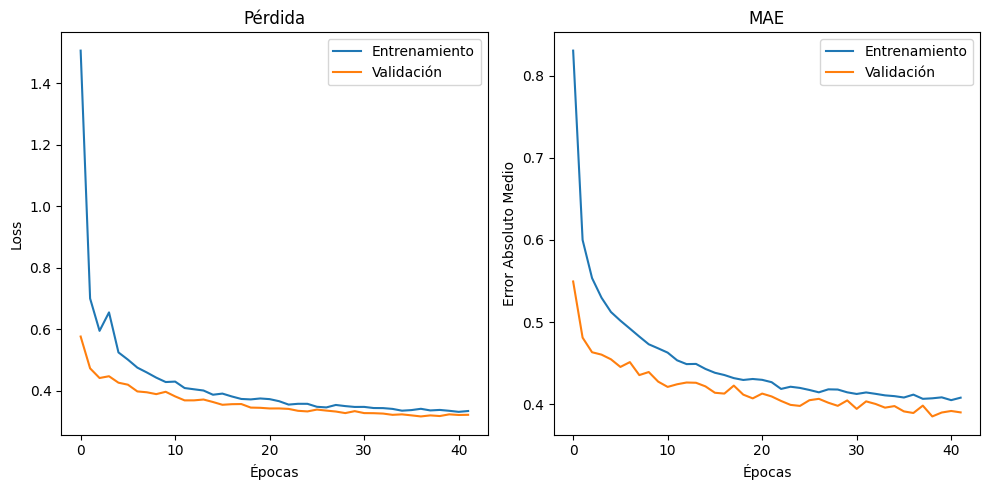

In [15]:
plt.figure(figsize=(10, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# MAE 
if 'mae' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Entrenamiento')
    plt.plot(history.history['val_mae'], label='Validación')
    plt.title('MAE')
    plt.xlabel('Épocas')
    plt.ylabel('Error Absoluto Medio')
    plt.legend()

plt.tight_layout()
plt.show()

In [16]:
mae

0.37959766387939453

In [17]:
# Exportamos metricas
hist_df = pd.DataFrame(history.history)
hist_df.to_csv('historial_entrenamiento.csv', index=False)

## 8. Conclusiones

### Conclusiones

- El modelo logró un error MAE de 0.37.
- La red no muestra signos fuertes de overfitting.
- En datasets bien estructurados y con bajo ruido como California Housing, modelos simples tienden a ofrecer un mejor rendimiento general. Introducir capas adicionales o técnicas de regularización innecesarias puede introducir complejidad que, lejos de mejorar, afecta negativamente el desempeño del modelo.